In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data = pd.read_csv('breast-cancer-wisconsin-data_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data = data.drop(columns=['id', 'Unnamed: 32'])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
print("Columns in DataFrame:", data.columns)

Columns in DataFrame: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Correlations with 'diagnosis':
 diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077

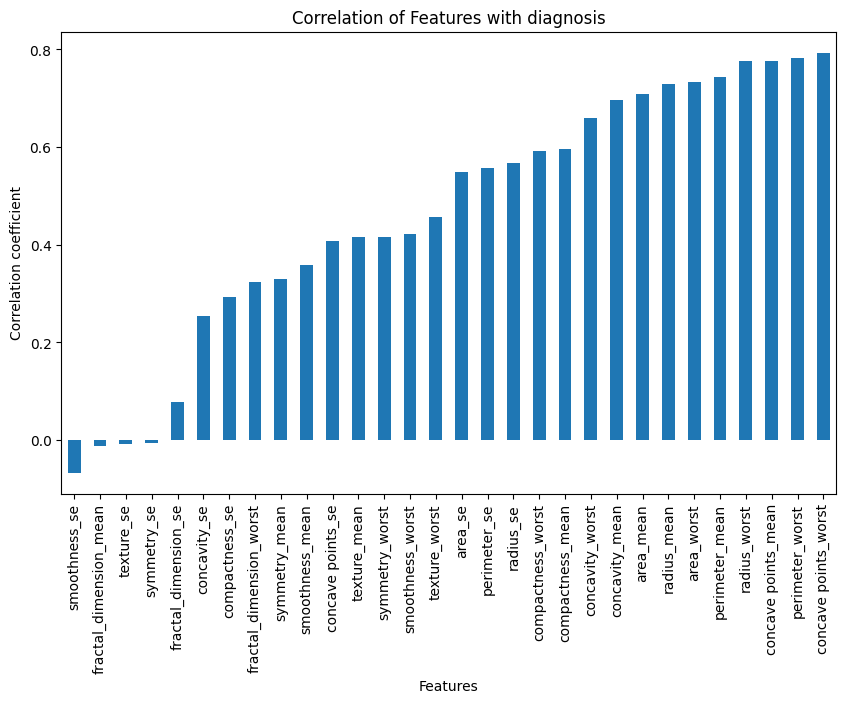

In [13]:
corr_matrix = data.corr()

target_column = 'diagnosis'
target_corr = corr_matrix[target_column]
sorted_corr = target_corr.sort_values(ascending=False)
print(f"Correlations with '{target_column}':\n", sorted_corr)

plt.figure(figsize=(10, 6))
target_corr.drop(target_column).sort_values().plot(kind='bar')
plt.title(f'Correlation of Features with {target_column}')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.show()

In [9]:
model = LogisticRegression()

In [15]:
X = data[["concave points_worst",
          "perimeter_worst",
          "concave points_mean",
          "radius_worst",
          "perimeter_mean",
          "area_worst",
          "radius_mean",
          "area_mean"]]

y = data['diagnosis']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Classification Report
#### Precision: 
The precision for class 0 is 0.95, and for class 1, it is 1.00. Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision for class 1 indicates that when the model predicts class 1, it is almost always correct.

#### Recall: 
The recall for class 0 is 1.00, and for class 1, it is 0.91. Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. The lower recall for class 1 (0.91) compared to class 0 (1.00) means that the model misses some class 1 instances.

#### F1-Score: 
The F1-score for class 0 is 0.97, and for class 1, it is 0.95. The F1-score is the harmonic mean of precision and recall. It gives a balance between precision and recall. Both classes have high F1-scores, indicating good overall performance.

#### Support: 
The support is the number of actual occurrences of each class in the dataset. There are 71 instances of class 0 and 43 instances of class 1.

#### Accuracy: 
The overall accuracy of the model is 0.96, meaning that 96% of the total predictions are correct.

#### Macro Average: 
The macro average is the unweighted average of precision, recall, and F1-score. It treats all classes equally. Here, the macro average F1-score is 0.96.

#### Weighted Average: 
The weighted average considers the support of each class. It gives a better indication of the performance when there is a class imbalance. The weighted average F1-score is also 0.96.

# Confusion Matrix
[[71, 0], [4, 39]]: The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions.
71 (True Negative): 71 instances of class 0 were correctly classified as class 0.
0 (False Positive): 0 instances of class 0 were incorrectly classified as class 1.
4 (False Negative): 4 instances of class 1 were incorrectly classified as class 0.
39 (True Positive): 39 instances of class 1 were correctly classified as class 1.

# Summary
The logistic regression model performs very well with high precision, recall, and F1-scores for both classes, and an overall accuracy of 96%. The model correctly identifies almost all instances of class 0 and most instances of class 1, with very few misclassifications. The confusion matrix confirms the strong performance, with only 4 misclassifications out of 114 total instances.